In [10]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

def integral(Y1,Y2,E1,E2):
    INT=(Y2*E2-Y1*E1)/((np.log(Y2/Y1)/np.log(E2/E1)+1))
    #print(E1,E2,INT)
    return INT

def load_obj(name):
    with open('C:\\Users\\ginti\\Desktop\\nirs\\' + name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
def Y_NM_Mi20_a(energy,h):
    P=np.sqrt(energy*energy+2*0.938*energy)
    X=np.log(P)
    if energy<1.7:
        a,b,c,d=0.5082, -3.0659, 7.2827, -9.5396
    #if energy<1.6:
    #    a,b,c,d=2.0404,	-8.1776,	12.354,	-11.1
    elif (energy>=1.7 and energy<15):
        a,b,c,d=0.1179,	-1.2022,	4.9329,	-8.65
    else:
        a,b,c,d=0,	-0.0365,	1.206,	-4.763
    LnY1000=a*X*X*X+b*X*X+c*X+d
    Y1000=np.exp(LnY1000)
    A = 9.422E-09*np.power(X,5) - 2.284E-07*np.power(X,4) + 2.037E-06*np.power(X,3) - 7.828E-06*np.power(X,2) + 1.203E-05*np.power(X,1) - 5.545E-06					
    B = -5.351E-06*np.power(X,5) + 1.316E-04*np.power(X,4) - 1.226E-03*np.power(X,3) + 5.176E-03*np.power(X,2) - 1.017E-02*np.power(X,1) + 1.458E-02				
    alt_dep=(1000-h)*(1000-h)*A+(1000-h)*B
    Y=Y1000*np.exp(alt_dep)
    return Y

def Y_NM_Mi20_p(energy, h):
    P=np.sqrt(energy*energy+2*0.938*energy)
    X=np.log(P)
    #if energy<1.25:
    #    a,b,c,d=6.09,	-14.06,	13.98,	-11.615
    if energy<1.28:
        a,b,c,d=0,	-8.6616,	13.879,	-12.104
    elif energy >=1.28 and energy<10:
        a,b,c,d=-0.186,	0.428,	2.831,	-8.76
    else:
        a,b,c,d=0,	-0.0365,	1.206,	-4.763
    LnY1000=a*X*X*X+b*X*X+c*X+d
    Y1000=np.exp(LnY1000)
    A= 6.945E-09*np.power(X,5) - 1.461E-07*np.power(X,4) + 1.115E-06*np.power(X,3) - 3.402E-06*np.power(X,2) + 3.355E-06*np.power(X,1) - 9.823E-07
    B= -3.963E-06*np.power(X,5) + 8.091E-05*np.power(X,4) - 6.394E-04*np.power(X,3) + 2.348E-03*np.power(X,2) - 4.713E-03*np.power(X,1) + 1.186E-02
    alt_dep=(1000-h)*(1000-h)*A+(1000-h)*B
    Y=Y1000*np.exp(alt_dep)
    return Y

In [11]:
def summ1(pc,depth):
    
    tt = depth
    
    data_protons = load_obj('AMS_spec_p')
    data_he = load_obj('AMS_spec_he')
    
    al = []
    s1 = 0
    
    for j in data_protons:
        for k in range(0,71):
            if float(data_protons[j].iloc[[k], [0]].values) > pc:            
                a = float(data_protons[j].iloc[[k], [4]].values)
                b = Y_NM_Mi20_p(a,tt) * float(data_protons[j].iloc[[k], [6]].values)
                c = float(data_protons[j].iloc[[k+1], [4]].values)
                d = Y_NM_Mi20_p(c,tt) * float(data_protons[j].iloc[[k+1], [6]].values)
                s1 += integral(b, d, a, c)
        al.append(s1)
        s1 = 0
        
    s2 = 0
    an = []
    
    iheavy = open('C:\\Users\\ginti\\Desktop\\nirs\\heavy.txt','r')
    linesiheavy = iheavy.readlines()
    heavy = []
    for x in linesiheavy:
        heavy.append(x.split()[1])
    iheavy.close()
    
    for j in data_he:
        for k in range(0,66):        
            if float(data_he[j].iloc[[k], [0]].values) > pc:
                a = float(data_he[j].iloc[[k], [4]].values)
                b = Y_NM_Mi20_a(a,tt) * float(data_he[j].iloc[[k], [6]].values) * (1 + float(heavy[k]))
                c = float(data_he[j].iloc[[k+1], [4]].values)
                d = Y_NM_Mi20_a(c,tt) * float(data_he[j].iloc[[k+1], [6]].values)  * (1 + float(heavy[k]))
                s2 += integral(b, d, a, c)
        an.append(4*s2)
        s2 = 0
    nn = []
    
    for i in range(len(an)):
        if al[i] == 0 :
            phe = 0
        else:
            phe = al[i] + an[i]
        nn.append(phe)
        
    return nn

time = load_obj('AMS_time')
t = []
for j in range(0, 79):
    a = float(time.iloc[[j], [0]].values)
    t.append(a)

In [12]:
n57 = summ1(6.90668,886.94)
nn57 = []
for i in n57:
    nn57.append(i/(sum(n57)/len(n57)))
n010 = summ1(0,1025.07)
nn010 = []
for i in n010:
    nn010.append(i/(sum(n010)/len(n010)))

Text(0, 0.5, '$NM_{1}/NM_{2}$')

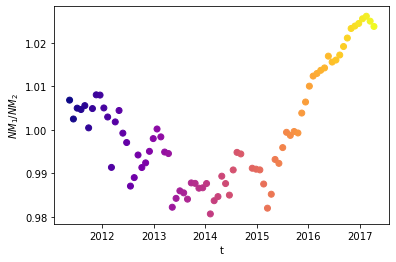

In [13]:
nnn=[]
for i in range(len(n57)):
    a=nn010[i]/nn57[i]
    nnn.append(a)
    
fig = plt.figure()
plt.scatter(t, nnn, c=t, cmap="plasma")
plt.xlabel('t')
plt.ylabel('$NM_{1}/NM_{2}$')

In [14]:
def summ3(pc):
    
    data_protons = load_obj('AMS_spec_p')
    data_he = load_obj('AMS_spec_he')
    
    al = []
    s1 = 0
    
    for j in data_protons:
        for k in range(0,71):
            if float(data_protons[j].iloc[[k], [0]].values) > pc:            
                a = float(data_protons[j].iloc[[k], [4]].values)
                b = a * float(data_protons[j].iloc[[k], [6]].values)
                c = float(data_protons[j].iloc[[k+1], [4]].values)
                d = c * float(data_protons[j].iloc[[k+1], [6]].values)
                s1 += integral(b, d, a, c)
        al.append(s1)
        s1 = 0
        
    s2 = 0
    an = []
    
    iheavy = open('C:\\Users\\ginti\\Desktop\\nirs\\heavy.txt','r')
    linesiheavy = iheavy.readlines()
    heavy = []
    for x in linesiheavy:
        heavy.append(x.split()[1])
    iheavy.close()
    
    for j in data_he:
        for k in range(0,66):        
            if float(data_he[j].iloc[[k], [0]].values) > pc:
                a = float(data_he[j].iloc[[k], [4]].values)
                b = a * float(data_he[j].iloc[[k], [6]].values) * (1 + float(heavy[k]))
                c = float(data_he[j].iloc[[k+1], [4]].values)
                d = c * float(data_he[j].iloc[[k+1], [6]].values)  * (1 + float(heavy[k]))
                s2 += integral(b, d, a, c)
        an.append(4*s2)
        s2 = 0
    nn = []
    
    for i in range(len(an)):
        if al[i] == 0 :
            phe = 0
        else:
            phe = an[i] / al[i]
        nn.append(phe)
        
    return nn

In [15]:
def summ4(ener):
    
    data_protons = load_obj('AMS_spec_p')
    data_he = load_obj('AMS_spec_he')
    
    al = []
    s1 = 0
    
    for j in data_protons:
        for k in range(0,71):
            if float(data_protons[j].iloc[[k], [4]].values) > ener:            
                a = float(data_protons[j].iloc[[k], [4]].values)
                b = a * float(data_protons[j].iloc[[k], [6]].values)
                c = float(data_protons[j].iloc[[k+1], [4]].values)
                d = c * float(data_protons[j].iloc[[k+1], [6]].values)
                s1 += integral(b, d, a, c)
        al.append(s1)
        s1 = 0
        
    s2 = 0
    an = []
    
    iheavy = open('C:\\Users\\ginti\\Desktop\\nirs\\heavy.txt','r')
    linesiheavy = iheavy.readlines()
    heavy = []
    for x in linesiheavy:
        heavy.append(x.split()[1])
    iheavy.close()
    
    for j in data_he:
        for k in range(0,66):        
            if float(data_he[j].iloc[[k], [4]].values) > ener:
                a = float(data_he[j].iloc[[k], [4]].values)
                b = a * float(data_he[j].iloc[[k], [6]].values) * (1 + float(heavy[k]))
                c = float(data_he[j].iloc[[k+1], [4]].values)
                d = c * float(data_he[j].iloc[[k+1], [6]].values)  * (1 + float(heavy[k]))
                s2 += integral(b, d, a, c)
        an.append(4*s2)
        s2 = 0
    nn = []
    
    for i in range(len(an)):
        if al[i] == 0 :
            phe = 0
        else:
            phe = an[i] / al[i]
        nn.append(phe)
        
    return nn

In [7]:
eph = []
for k in range(1,11):
    a = summ4(k)
    eph.append(a)
    
corr3 = []

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

for k in eph:
    x = np.array(k).reshape((-1, 1))
    y = np.array(nnn)
    model = LinearRegression().fit(x, y)

    x_train = x.reshape(-1, 1)
    x_test = x.reshape(-1, 1)
    y_pred = model.predict(x_test)
    coefficient_of_dermination = r2_score(y, y_pred)
    corr3.append(coefficient_of_dermination)

print(corr3)

[0.9864646756332945, 0.9907095491862313, 0.9764375135340649, 0.9319509907130823, 0.873221299114314, 0.7791272547585718, 0.7199394715571723, 0.5694803715462289, 0.49162481722337714, 0.4165896756358197]


In [8]:
rph = []
for k in range(1,11):
    a = summ3(k)
    rph.append(a)
    
corr4 = []

for k in rph:
    x = np.array(k).reshape((-1, 1))
    y = np.array(nnn)
    model = LinearRegression().fit(x, y)

    x_train = x.reshape(-1, 1)
    x_test = x.reshape(-1, 1)
    y_pred = model.predict(x_test)
    coefficient_of_dermination2 = r2_score(y, y_pred)
    corr4.append(coefficient_of_dermination2)

    
print(corr4)

[0.9696772554964326, 0.967181653179435, 0.9258763391826208, 0.8224269701139209, 0.6783527108328353, 0.467565392759416, 0.2654753231213631, 0.18312032505731246, 0.08298558954068391, 0.05432512605514461]


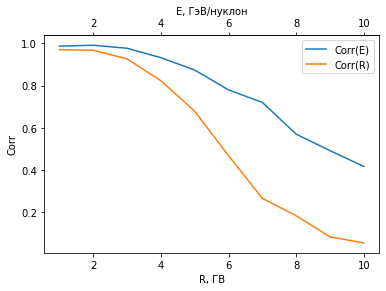

In [9]:
eeph = [1,2,3,4,5,6,7,8,9,10]
rrph = [1,2,3,4,5,6,7,8,9,10]

fig, ax = plt.subplots()
ax.plot(eeph, corr3)
ax.plot(rrph, corr4)

ax2 = ax.secondary_xaxis("top")

ax2.set_xlabel("E, ГэВ/нуклон")
ax.set_xlabel("R, ГВ")
ax.set_ylabel("Corr")
ax.legend(["Corr(E)", "Corr(R)"])
plt.show()

In [56]:
ee = []
tt = [1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,2.1,2.2]
for k in tt:
    a = summ4(k)
    ee.append(a)
    
corr = []

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

for k in ee:
    x = np.array(k).reshape((-1, 1))
    y = np.array(nnn)
    model = LinearRegression().fit(x, y)

    x_train = x.reshape(-1, 1)
    x_test = x.reshape(-1, 1)
    y_pred = model.predict(x_test)
    coefficient_of_dermination = r2_score(y, y_pred)
    corr.append(coefficient_of_dermination)

In [43]:
rr = []
tt = [1.7,1.8,1.9,2,2.1,2.2,2.3,2.4,2.5,2.6,2.7]
for k in tt:
    a = summ3(k)
    rr.append(a)
    
corr2 = []

for k in rr:
    x = np.array(k).reshape((-1, 1))
    y = np.array(nnn)
    model = LinearRegression().fit(x, y)

    x_train = x.reshape(-1, 1)
    x_test = x.reshape(-1, 1)
    y_pred = model.predict(x_test)
    coefficient_of_dermination2 = r2_score(y, y_pred)
    corr2.append(coefficient_of_dermination2)

KeyboardInterrupt: 

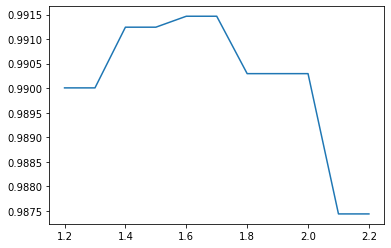

In [57]:
fig, ax = plt.subplots()
ax.plot(tt, corr)

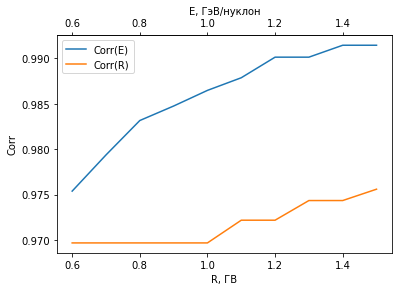

In [12]:
fig, ax = plt.subplots()
ax.plot(tt, corr)
ax.plot(tt, corr2)

ax2 = ax.secondary_xaxis("top")

ax2.set_xlabel("E, ГэВ/нуклон")
ax.set_xlabel("R, ГВ")
ax.set_ylabel("Corr")
ax.legend(["Corr(E)", "Corr(R)"])
plt.show()

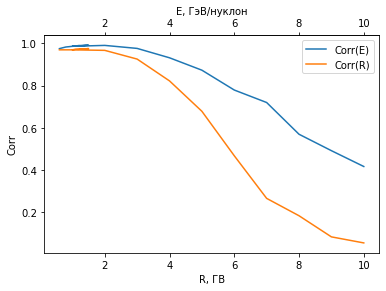

0.991432832534747
0.9755894838097992


In [13]:
ttt = tt + eeph
corr5 = corr + corr3
corr6 = corr2 + corr4

fig, ax = plt.subplots()
ax.plot(ttt, corr5)
ax.plot(ttt, corr6)

ax2 = ax.secondary_xaxis("top")

ax2.set_xlabel("E, ГэВ/нуклон")
ax.set_xlabel("R, ГВ")
ax.set_ylabel("Corr")
ax.legend(["Corr(E)", "Corr(R)"])
plt.show()

print(max(corr5))
print(max(corr6))

In [16]:
phee1 = summ4(1.7)

In [17]:
time = load_obj('AMS_time')
t = []
for j in range(0, 79):
    a = float(time.iloc[[j], [0]].values)
    t.append(a)

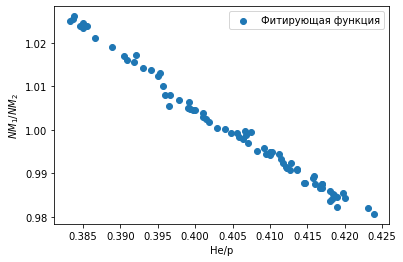

[-1.13071551] 1.4580191878930484


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

plt.scatter(phee1, nnn)

x = np.array(phee1).reshape((-1, 1))
y = np.array(nnn)
model = LinearRegression().fit(x, y)

x_train = x.reshape(-1, 1)
x_test = x.reshape(-1, 1)
y_pred = model.predict(x_test)

a = model.coef_
b = model.intercept_

xx = np.linspace(2.27, 2.58)
yy = b + xx*a

#plt.plot(xx, yy, color='black', linewidth=1)
plt.xlabel('He/p')
plt.ylabel('$NM_{1}/NM_{2}$')
plt.legend(["Фитирующая функция", "Исходные данные"])
plt.show()

print(a,b)

Text(0, 0.5, '$NM_{1}/NM_{2}$')

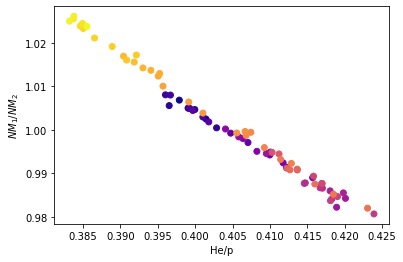

In [22]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from colorspacious import cspace_converter

cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=4, vmax=5)
plt.scatter(phee1, nnn, c=t, cmap="plasma")
#plt.plot(xx, yy, color='black', linewidth=1)
plt.xlabel('He/p')
plt.ylabel('$NM_{1}/NM_{2}$')

In [24]:
print(nnn)

[1.0068264580480648, 1.0024830010440968, 1.0049784320857678, 1.0046618387710227, 1.0055644516979232, 1.000444032904152, 1.0048870107412882, 1.0080463908144608, 1.0079893071348107, 1.0050246235124298, 1.0029451534205422, 0.9913423496378374, 1.001814373753938, 1.0044412618038177, 0.9992244395982627, 0.9970680164118784, 0.9870379876264893, 0.9889944706114574, 0.994197936248753, 0.9913123905433306, 0.9923878489782897, 0.9950413941080555, 0.9979734857466362, 1.0001829465445404, 0.9983680223264091, 0.9948786232872524, 0.9945287514497646, 0.9821748693705583, 0.984216500122353, 0.9859464351402275, 0.9854822109477561, 0.9840353787230964, 0.9877726275051213, 0.9876641509611779, 0.9865566117611517, 0.9866487066903624, 0.9876311054443268, 0.9806346486068491, 0.9836766853900678, 0.9846240717683034, 0.9893220000513705, 0.9876216724174114, 0.9849633339467656, 0.9907568530083963, 0.9948005772219213, 0.994442296464771, 0.99114977196008, 0.9909337303401788, 0.9907699640355729, 0.9875168640245873, 0.9819

In [24]:
phe = (nm-b)/a

NameError: name 'nm' is not defined

In [62]:
print(phee1)

[2.513338070030985, 2.491006632264977, 2.5059814715648945, 2.5002806964244564, 2.521924340928526, 2.4822258060516975, 2.5043714114494, 2.5250947462659568, 2.5208488370412705, 2.5054511228936565, 2.493588939017234, 2.4259428050380363, 2.4886884650996173, 2.5020001532858185, 2.4706238888788437, 2.456606121935923, 2.3987705025687087, 2.4054639779576963, 2.439118625922335, 2.4254874895845067, 2.42853961265883, 2.4494256203541545, 2.46065276549418, 2.4748961018427695, 2.4640491100564033, 2.4387040747848907, 2.441848572552858, 2.387039064293444, 2.380327673829161, 2.3919920379959394, 2.3818986833264013, 2.3907790980752175, 2.4111893876500643, 2.4119462511591063, 2.397908473755291, 2.399691244324619, 2.398474009493149, 2.358903871721575, 2.3917263995235647, 2.386377090765058, 2.4047616215009295, 2.3981059286250193, 2.3889936826764537, 2.417422637820717, 2.4372924998810834, 2.4317952705079926, 2.4256136689633303, 2.4174312627074936, 2.423138707590531, 2.4037727545912384, 2.3636688700353874, 2.